# Линейная алгебра. Лабораторная работа 1, осень 2022


## Часть 1. Библиотеки

В этой лабораторной работе вам понадобятся три библиотеки:

- `numpy` – основная библиотека для работы с матрицами;
- `scipy`, а точнее модуль `scipy.linalg`, содержащий множество функций линейной алгебры;
- `matplotlib` – графическая библиотека


In [ ]:
# Библиотеки
import numpy as np

import scipy.linalg as sla

import matplotlib.pyplot as plt
%matplotlib inline

**Задание 1.1 [0.2 балла за каждый пункт]** В качестве первого задания мы попросим вас отыскать соответствующие функции в библиотеке и сделать следующее:

- создайте нулевую матрицу $Z$ размера $3\times4$;

- создайте диагональную матрицу $5\times5$ с диагональными элементами 1, 2, 3, 4 и 5;

- найдите её след (не силою мысли, а с помощью библиотечных функций, конечно);

- найдите обратную к ней матрицу;

- сгенерируйте случайную матрицу $X$ размера $4\times5$;

- найдите определитель подматрицы матрицы $X$, расположенной на пересечении 2-й и 3-й строк и 1-го и 2-го столбцов; считаем, что строки и столбцы нумеруются с единицы (используйте slicing!). Такой определитель называется **минором** матрицы $X$;

- найдите произведение $X^TX$.


In [ ]:
#1
s = np.zeros((3,4), dtype=int)
print(s)

[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]


In [ ]:
#2
s = np.diag(np.arange(1, 6))
print(s)

[[1 0 0 0 0]
 [0 2 0 0 0]
 [0 0 3 0 0]
 [0 0 0 4 0]
 [0 0 0 0 5]]


In [ ]:
#3
s = np.diag(np.arange(1, 6))
tr = np.trace(s)
print(tr)

15


In [ ]:
#4
s = np.diag(np.arange(1, 6))
s1 = np.linalg.inv(s)
print(s1)

[[1.         0.         0.         0.         0.        ]
 [0.         0.5        0.         0.         0.        ]
 [0.         0.         0.33333333 0.         0.        ]
 [0.         0.         0.         0.25       0.        ]
 [0.         0.         0.         0.         0.2       ]]


In [ ]:
#5
X = np.random.rand(4,5)
print(X)

[[0.3261613  0.9351346  0.44695259 0.3854941  0.73706583]
 [0.00634164 0.33449779 0.7777986  0.17350873 0.96239184]
 [0.72270452 0.76584124 0.07391617 0.08434631 0.36805099]
 [0.29727316 0.10043365 0.64920761 0.42074347 0.69358823]]


In [ ]:
#6
X = np.random.rand(4,5)
X1 = X[np.ix_((1, 2), (0, 1))]
det = np.linalg.det(X1)
print(det)

-0.12558446369132584


In [ ]:
#7
X = np.random.rand(4,5)
X1 = X.T
mult = np.dot(X, X1)
print(mult)

[[1.89575128 2.16042134 1.5171172  1.04723457]
 [2.16042134 2.97013309 2.29496379 1.19503988]
 [1.5171172  2.29496379 2.06907724 1.11589229]
 [1.04723457 1.19503988 1.11589229 1.60603863]]


## Часть 2. Время

Питон мотивирует пользоваться библиотечными функциями, когда они доступны, а не писать собственные. Библиотечные функции основаны на современных алгоритмах, обычно пишутся на более эффективных языках, таких как C++ или Fortran, а кроме того, оптимизированы для работы на многопроцессорных устройствах, так что обогнать эти решения просто так вы не сможете.

**Задание 2.1 [1 балл]**
Мы предлагаем вам убедиться в этом самим. Напишите функцию `my_det`, которая вычисляла бы определитель матрицы с помощью элементарных преобразований над строками. Функция должна выкидывать `ValueError` в случаях, если матрица не является квадратной.

In [ ]:
from copy import deepcopy


def move_zeros(matrix, sz, row_start_index, col_index):
    count_of_swaps = 0
    column = []
    temporary_column = matrix[:, col_index]
    for i in range(row_start_index, sz):
        column.append((temporary_column[i], i))
    for i in range(len(column)):
        is_sorted = True
        for j in range(len(column) - i - 1):
            if abs(column[j][0]) < abs(column[j + 1][0]):
                column[j], column[j + 1] = column[j + 1], column[j]
                is_sorted = False
                count_of_swaps += 1
        if is_sorted:
            break
    new_matrix = matrix[:row_start_index, :]
    for i in column:
        t = matrix[i[1],:]
        new_matrix = np.concatenate((new_matrix, [t]), axis=0)
    return new_matrix, count_of_swaps

def my_det(X):
    '''
    Parameters
    ----------
    X : array_like

    Returns
    -------
    det : float
        Determinant of `a`.
    '''
    sz = X.shape
    if sz[0] != sz[1]:
        raise ValueError
    else:
        row_index = 0
        matrix = X.astype(float).copy()
        sign = 0
        for col in range(0, sz[0] - 1):
            matrix, cnt = move_zeros(matrix, sz[0], row_index, col)
            matrix = deepcopy(matrix)
            sign += cnt
            if matrix[row_index, col] == 0:
                return 0
            for row in range(row_index + 1, sz[0]):
                if matrix[row, col] == 0:
                    break
                scalar = -matrix[row, col] / matrix[row_index, col]

                for i in range(sz[0]):
                    matrix[row, i] = float(matrix[row, i] + matrix[row_index, i]*scalar)
            row_index += 1
        # print(matrix)
        det = 1
        for i in range(sz[0]):
            det *= matrix[i, i]
        det *= (-1)**sign
        return det
    # Your code here

    return det

Простая проверка:

In [ ]:
X = np.array([[0,0,1], [0,1,0], [1,0,0]])
print(my_det(X))

-1.0


На случай, если нам просто повезло с этой матрицей, имеет смысл написать чуть более хитрые тесты. Мы сгенерируем несколько случайных матриц $50\times50$ с помощью функции `numpy.random.rand` и сравним ответ, выдаваемый нашей функцией, с настоящим определителем (результатом работы библиотечной функции `scipy.linalg.det`):

In [ ]:
for _ in range(50):
    X = np.random.rand(50, 50)
    if np.abs(my_det(X) - sla.det(X)) > 1e-6:
        print('FAILED')

Если вы ни разу не получили `FAILED`, то ваша функция работает правильно.

Теперь давайте сравним скорость работы вашей функции и библиотечной функции `scipy.linalg.det`. В Питоне есть несколько способов измерения времени; мы воспользуемся декоратором `%timeit`. Будучи написан перед функцией, он запускает её некоторое количество раз, выбирает три случайных запуска и возвращает длительность самого быстрого из них. Модификатор `-o` между декоратором и функцией позволяет сохранять результаты работы декоратора в переменную.

Приготовьтесь, что следующий блок может работать сравнительно долго.

In [ ]:
lib_times = []
my_times = []
dimensions = [10, 100, 1000]
for dim in dimensions:
    A = np.random.rand(dim, dim)
    res_lib = %timeit -o sla.det(A)
    lib_times.append(res_lib.best)
    res_my = %timeit -o my_det(A)
    my_times.append(res_my.best)

plt.plot(dimensions, lib_times, color='blue', label='Library function')
plt.plot(dimensions, my_times, color='red', label='My function')
plt.title('My function vs library function, log y scale')
plt.ylabel('Time')
plt.xlabel('Matrix dimension')
plt.legend()

22.1 µs ± 10.5 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
2.08 ms ± 397 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
992 µs ± 267 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
631 ms ± 369 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
38.7 ms ± 3.1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


<ipython-input-9-f9aef8d757d5>:60: RuntimeWarning: overflow encountered in double_scalars
  det *= matrix[i, i]


У вас должны были получиться графики, показывающие, как растёт с ростом размерности матрицы время вычисления определителя. Поскольку они вышли не больно-то красивыми, мы нарисуем их в *логарифмическом масштабе* по оси у:

In [ ]:
plt.semilogy(dimensions, lib_times, color='blue', label='Library function')
plt.semilogy(dimensions, my_times, color='red', label='My function')
plt.title('My function vs library function, log y scale')
plt.ylabel('Time')
plt.xlabel('Matrix dimension')
plt.legend()

Вы можете убедиться, что библиотечная функция работает *гораздо* быстрее.

## Часть 3. Точность

Наверняка вы уже что-то знаете про floating point arithmetics и связанные с этим трудности и понимаете, что на компьютере вычисления с вещественными числами производятся лишь с ограниченной точностью.

**Задание 3.1 [0.6 балла]** В качестве первого примера, показывающего различие между длинной арифметикой целых чисел и floating point arithmetics, предлагаем вам перемножить две пары матриц:

$$
\begin{pmatrix}
1 & 0\\
10^{20} & 1
\end{pmatrix}
\cdot
\begin{pmatrix}
10^{-20} & 1\\
0 & 1 - 10^{20}
\end{pmatrix}
$$
и
$$
\begin{pmatrix}
1. & 0.\\
10.^{20} & 1.
\end{pmatrix}
\cdot
\begin{pmatrix}
10.^{-20} & 1.\\
0. & 1. - 10.^{20}
\end{pmatrix}
$$
Во втором случае мы специально указали Питону (поставив везде десятичные точки), что хотим работать не с целыми числами, а с числами с плавающей точкой. Посмотрим, получатся ли одинаковые ответы:

In [ ]:
A1 = np.array([[1, 0], [10 ** 20, 1]])
B1 = np.array([[10 ** (-20), 1], [0, 1 - 10 ** 20]])

A2 = np.array([[1., 0.], [10.**20, 1.]])
B2 = np.array([[10.**(-20), 1.], [0., 1. - 10.**20]])

print(np.dot(A1, B1))
print(np.dot(A2, B2))

[[1e-20 1]
 [1.0 1]]
[[1.e-20 1.e+00]
 [1.e+00 0.e+00]]


И какой из них правильный?

---
**Первый**

**Задание 3.2 [0.75 балла]** Впрочем, и с целыми числами тоже не всегда всё хорошо. Напишите функцию, генерирующую *матрицу Паскаля* заданной размерности $n$, то есть матрицу $P$, в которой $P_{ij} = C_{i+j}^i$. В этом задании нельзя пользоваться библиотечной функцией `scipy.linalg.pascal` или её аналогами из других библиотек. Обратите внимание, что использование факториалов крайне нежелательно, так как быстро приведёт к переполнению.

В этом задании вы можете использовать цикл ``for``.

In [ ]:
def my_pascal(dim):
    '''
    Мы создали для вас матрицу из нулей размера dim x dim,
    но вы можете ей не пользоваться, если не хотите
    '''
    P = np.zeros((dim, dim))

    for i in range(dim):
        P[i, 0] = 1
        P[0, i] = 1
    for j in range(1, dim):
        for k in range(1, dim):
            P[j, k] = P[j - 1, k] + P[j, k - 1]
    return P

print(my_pascal(4))

[[ 1.  1.  1.  1.]
 [ 1.  2.  3.  4.]
 [ 1.  3.  6. 10.]
 [ 1.  4. 10. 20.]]


Чему равен её определитель? **Строго** поясните свой ответ.

----
Докажем, что эту матрицу можно привести к верхнетреугольной, в которой на главной диагонали будут стоять единицы. Тогда поскольку она верхнетреугольная, то по свойству определителя он будет равен произведению всех элементов, стоящих на главной диагонали, то есть единице.

Если из j+1-ой строки вычитать j-ую строку, то все ее элементы "сдвинутся" на один вправо, а слева появятся нули. Соответственно если поочередно из самой нижней строчки (пусть она будет n-ая) вычесть n-1-ую, из n-1-ой вычесть n-2-ую и так далее до самой верхней строчки, а затем повторять эти же операции снова и снова, то мы придем к верхнетреугольной матрице, в которой на главной диагонали будут стоять единицы (так как в изначальной матрицы весь первый столбец состоит из единичек)



А теперь вычислите определитель матрицы Паскаля $30\times30$ с помощью библиотечной функции `scipy.linalg.det`:

In [ ]:
print(sla.det(my_pascal(30)))

-3.400444993542751e+51


Разница заметна невооружённым взглядом!

## Часть 4. Матричные вычисления

Вы уже видели, что использования циклов (и самописных вычислений в целом) в Питоне лучше по возможности избегать, и важно уметь находить способы делать всё библиотечными средствами.

В качестве примера рассмотрим две задачи:

**1.** Предположим, нужно вычислить суммы элементов в каждой строке матрицы `A`. Ясно, что можно написать простую функцию с двумя циклами, которая это посчитает, но так лучше не делать. Правильный способ такой:
```
A.sum(axis=1)
```
Параметр `axis=1` означает, что суммы берутся по строкам. Если вы хотите просуммировать по столбцам, укажите `axis=0`. Если вообще пропустить параметр `axis` (вызвать `A.sum()`), то функция вернёт сумму *всех* элементов матрицы.

**2.** Теперь допустим, что нам нужно каждый столбец матрицы `A` умножить на некоторое число. Более точно, пусть у нас есть (одномерный) вектор `w = np.array([w_1,...,w_n])`, и мы должны `i`-й столбец `A` умножить на число `w_i`. Опять же, это можно сделать в пару циклов, но лучше использовать операцию поэлементного умножения:
```
A * w.reshape((1,n))
```
Оператор `reshape` нужен для того, чтобы из одномерного вектора сделать вектор-строку.

Аналогично, если на числа `w_1,...,w_n` умножаются *строки* матрицы, нужно превратить `w` в вектор-столбец:
```
A * w.reshape((n,1))
```

Дальше вам будет предложено попрактиковаться в матричных вычислениях. В следующих трёх заданиях нельзя пользоваться циклами, а также конструкциями `map` и `reduce` и им подобными; вместо этого постарайтесь свести всё к матричным операциям из `numpy` (но, опять же, не `np.vectorize` или чему-то подобному). Чтобы убедиться, что получилось именно то, что нужно, пишите собственные тесты со случайными матрицами.

**Задание 4.1 [0.75 балла]** Напишите функцию `prod_and_sq_sum(A)`, вычисляющую произведение диагональных элементов, а также сумму квадратов диагональных элементов квадратной матрицы `A`.

In [ ]:
def prod_and_sq_sum(A):
    d = np.diag(A)
    return d.prod(), np.sum(d**2)

A = np.random.rand(2, 2)
print(A)
print(prod_and_sq_sum(A))

[[0.51175327 0.67858979]
 [0.02497549 0.9570144 ]]
(0.48975525024744576, 1.1777679735246251)


**Задание 4.2 [0.75 балла]** Для матриц `A` и `B` размера $m\times n$ обозначим через $a_1,\ldots,a_n$ и $b_1,\ldots,b_n$ соответственно их столбцы; пусть также $\lambda_1, \ldots, \lambda_n$ – некоторые числа. Напишите функцию `f(A, B, lmbd, k)`, вычисляющую

$$\sum_{i=1}^{\min(k,n)}\lambda_ia_ib_i^T$$

In [ ]:
def f(A, B, lmbd, k):
    m, n = A.shape[0], A.shape[1]
    k = min(k, n)
    A = A * lmbd.reshape((1, n))
    A = A[:, :k]
    B = B[:, :k]
    B = B.T
    X = np.dot(A, B)
    return X
m = 2
n = 3
A = np.random.rand(2, 3)
B = np.random.rand(2, 3)
lmbd = np.random.rand(1, 3)
print(A)
print(B)
print(lmbd)
print(f(A, B, lmbd, 10))

[[0.99862384 0.57652494 0.05653063]
 [0.27858267 0.86134045 0.66549269]]
[[0.645367   0.63106312 0.41416901]
 [0.60881791 0.00682773 0.51397723]]
[[0.80276159 0.3655517  0.61677337]]
[[0.66479989 0.50742263]
 [0.51302536 0.34926924]]


## Часть 5. Комплексные числа и геометрия

У вас уже была возможность убедиться, что многие операции над комплексными числами имеют наглядную геометрическую интерпретацию. В этом задании вам будет предложено этим воспользоваться.

В Python число $i$ (мнимая единица) обозначено через `1j`. Так, число $0,5 + 1,2i$ будет иметь вид `0.5 + 1.2 * 1j`.

При выполнении задания вы должны работать с точками плоскости как с комплексными числами. Любые преобразования должны быть реализованы с помощью операций над комплексными числами: сложения, вычитания, умножения, деления, возведения в степень и комплексного сопряжения.

**Задание 5.1 [0.5 баллов]** Напишите функцию `shrink_rotate`, которая принимает на вход:
- заданную в виде комплексного числа точку $X$, которую мы подвергаем преобразованию,
- заданную в виде комплексного числа точку $A$,
- действительный коэффициент `coef`,
- угол `alpha`, заданный в радианах

и осуществляет следующее преобразование: мы берём вектор $AX$, умножаем его на `coef`, поворачиваем вокруг точки $A$ на угол `alpha` против часовой стрелки, после чего возвращаем конец полученного вектора. Ниже (левая картинка) мы приводим иллюстрацию действия этого преобразования:

<img src="ShrinkRotate.png">

**Задание 5.2 [0.5 баллов]** Напишите функцию `shrink_rotate_conj`, которая сначала делает то же самое, что и `shrink_rotate`, а после этого отражает вектор $AY$ относительно горизонтальной прямой, проходящей через точку $A$, и возвращает точку $Y'$ (см. правую часть рисунка).

**Задание 5.3 [0.5 баллов]** Напишите функцию `geometric_inverse`, которая принимает на вход:
- заданную в виде комплексного числа точку $X$, которую мы подвергаем преобразованию,
- заданную в виде комплексного числа точку $A$,
- положительное действительное число $r$

и осуществляет инверсию точки $X$ относительно окружности с центром $A$ радиуса $r$. [Определение инверсии вы можете посмотреть здесь](https://ru.wikipedia.org/wiki/%D0%98%D0%BD%D0%B2%D0%B5%D1%80%D1%81%D0%B8%D1%8F_(%D0%B3%D0%B5%D0%BE%D0%BC%D0%B5%D1%82%D1%80%D0%B8%D1%8F)).

In [ ]:
from math import cos, sin, radians

def shrink_rotate(x, a, coef=1., angle=0.):
    angle = radians(angle)
    e = (x - a) * (cos(angle) + 1j * sin(angle))
    e *= coef
    e += a
    return e

def shrink_rotate_conj(x, a, coef=1., angle=0.):
    angle = radians(angle)
    e = (x - a) * (cos(angle) + 1j * sin(angle))
    e *= coef
    e = e.conjugate()
    e += a
    return e

def geometric_inverse(x, a, r):
    e1 = (x - a).conjugate()
    return r * r / e1 + a

**Задание 5.4 [0.75 баллов]** Рассмотрим следующий процесс:

```
z = 0.5 + 0.*1j
max_iter = 100000
funcs = [
    (lambda t: shrink_rotate(t, 0. + 1.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, 1. + 0.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, -1. + 0.*1j, coef=0.5, angle=0.))
]

for n_iter in range(max_iter):
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)
```

Запустите его и нарисуйте множество точек, получающихся на итерациях начиняя с десятой.

*Указание*. Представьте квадрат $[-1,1]\times[-1,1]$ матрицей пикселей 1000x1000. Сначала все элементы матрицы положим нулями, а на каждой итерации начиная с десятой будем присваивать единицу соответствующему пикселю этой матрицы. То, что получилось, можно нарисовать с помощью функции `plt.imshow(..., cmap='gray')`. Картинку лучше сделать побольше, предварив `imshow` вызовом `plt.figure(figsize=(20, 20))`.

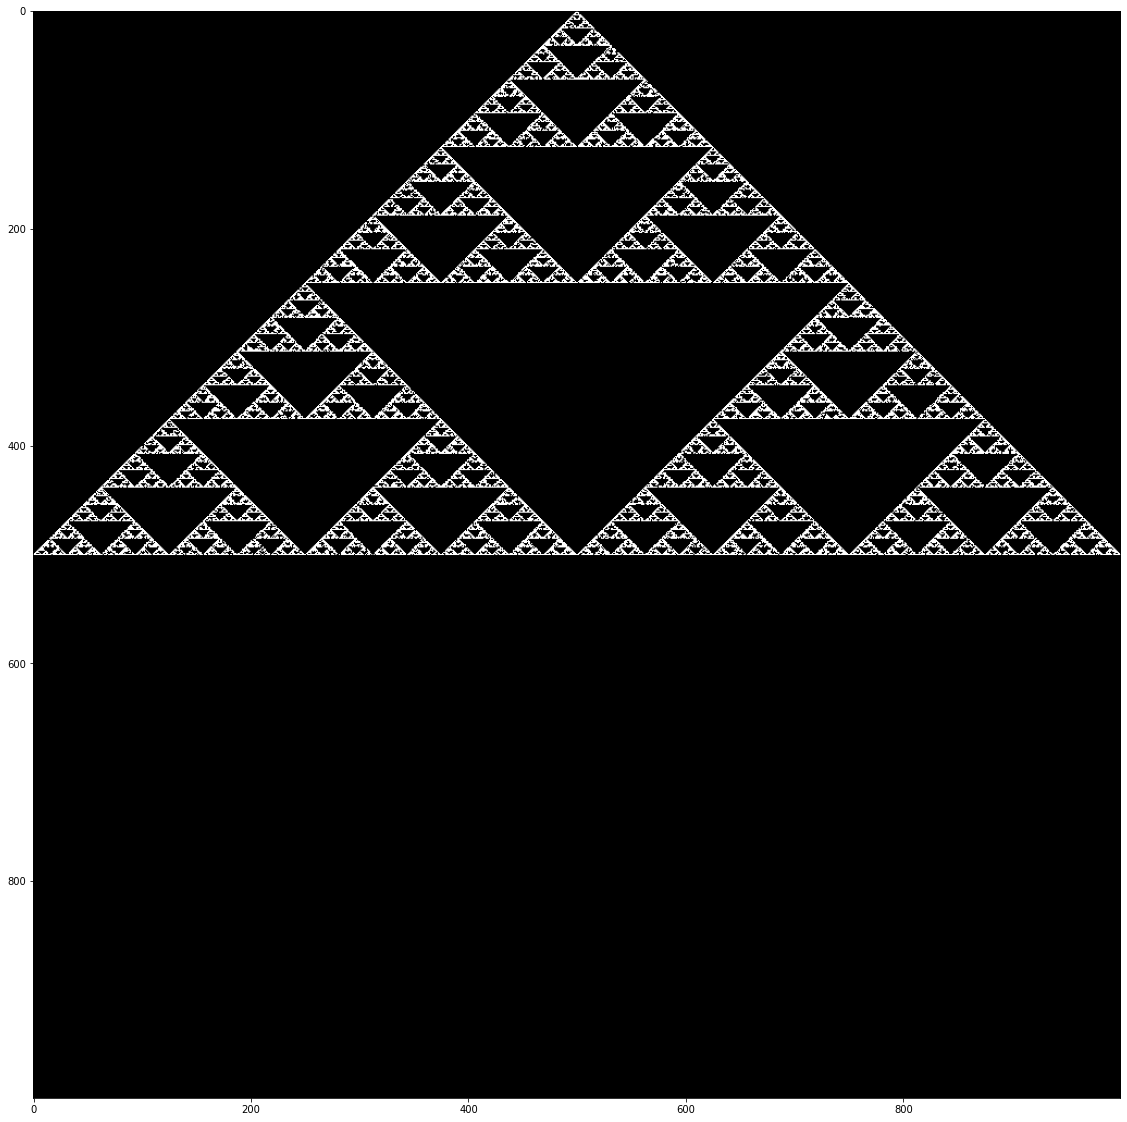

In [ ]:
arr = np.zeros((1000, 1000))
z = 0.5 + 0.*1j
max_iter = 100000
funcs = [
    (lambda t: shrink_rotate(t, 0. + 1.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, 1. + 0.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, -1. + 0.*1j, coef=0.5, angle=0.))]



for n_iter in range(10, max_iter):
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)
    x = int(-500 - z.imag * 500)
    y = int(500 + z.real * 500)
    arr[x][y] = 1

plt.figure(figsize=(20, 20))
plt.imshow(arr, cmap='gray')

**Задание 5.5 [0.75 баллов]** Попробуйте объяснить, почему получается именно эта фигура.

Все треугольники внутри (не выходят за границы и не увеличиваются), поскольку коэффициенты меньше единички. Во-вторых тут как-то надо объяснить зависимость того, что проводятся средние линии, от того, что коэффициенты 0.5. Далее все получившиеся, кроме одного(центрального, перевернутого), треугольники делятся еще, еще и еще

**Задание 5.6 [0.5 баллов]** Поэкспериментируйте с другими преобразованиями. Попробуйте найти какой-нибудь другой красиво выглядящий фрактал.

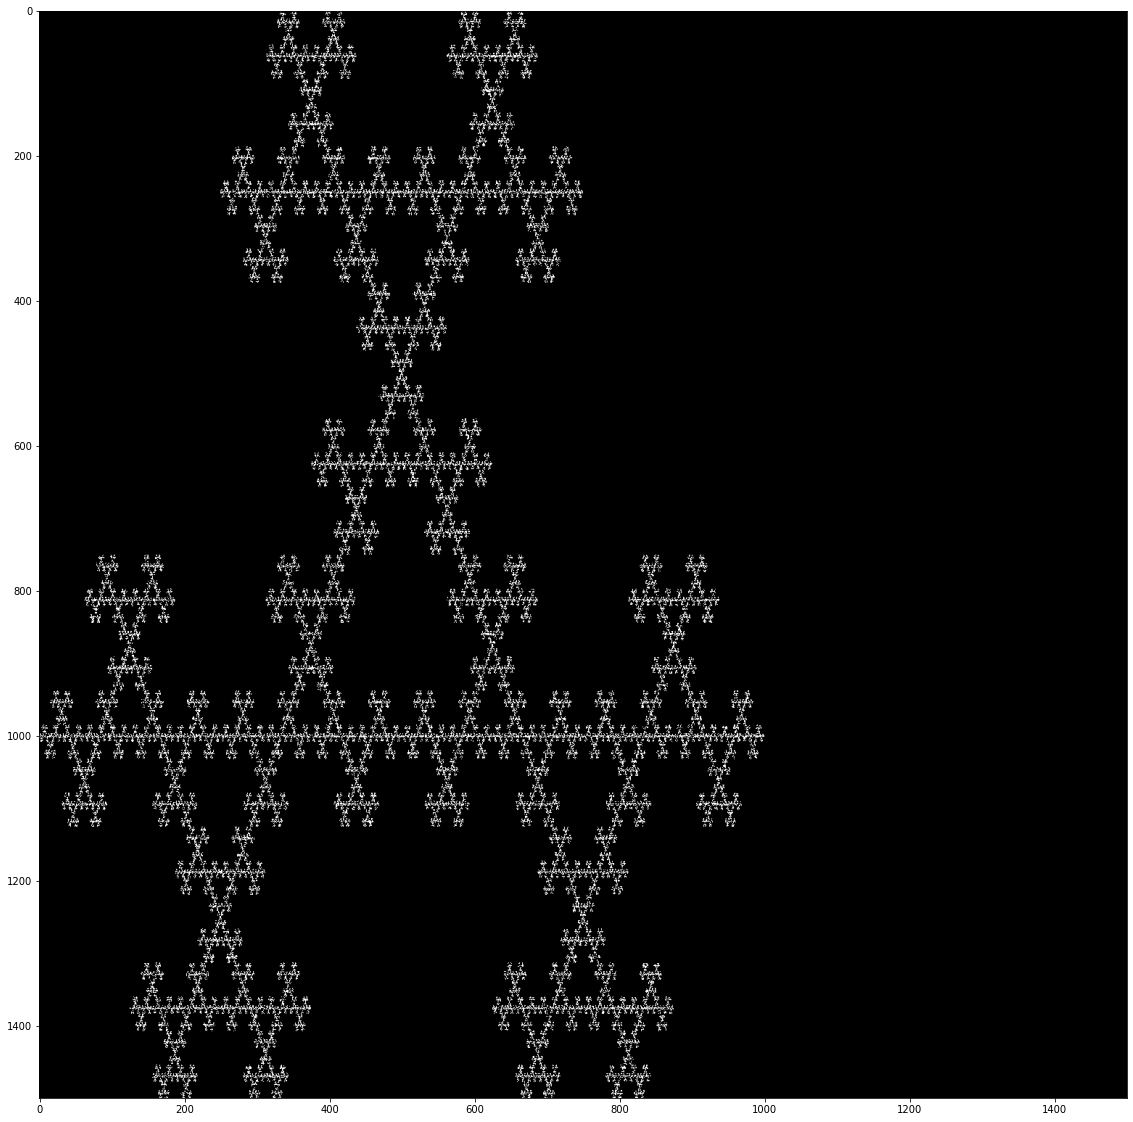

In [ ]:
arr = np.zeros((1500, 1500))
z = 0.5 + 0.*1j
max_iter = 100000
funcs = [
    (lambda t: shrink_rotate_conj(t, 0. + 1.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate_conj(t, 1. + 0.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate_conj(t, -1. + 0.*1j, coef=0.5, angle=0.))]



for n_iter in range(10, max_iter):
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)
    x = int(-500 - z.imag * 500)
    y = int(500 + z.real * 500)
    arr[x][y] = 1
plt.figure(figsize=(20, 20))
plt.imshow(arr, cmap='gray')